# Keras: Redes Neurais

O Iris dataset é um conjunto de dados bem conhecido na comunidade acadêmica, esse conjunto de dados consiste em 50 amostras de cada uma das três espécies (150 amostras, no total) de Iris: *Iris setosa, Iris virginica e Iris versicolor*.

Quatro variáveis foram medidas em cada amostra: o comprimento (*length*) e a largura (*width*) das sépalas (*Sepal*) e pétalas (*Petal*), em centímetros. Com base na combinação dessas quatro características, é possível distinguir as espécies umas das outras.

![](https://kedro.readthedocs.io/en/0.17.5/_images/iris_measurements.png)

Abaixo a representação dos três tipos de flores Iris.

![](https://www.embedded-robotics.com/wp-content/uploads/2022/01/Iris-Dataset-Classification.png)

### Importando os dados

É possivel realizar a coleta desse dataset através do método [`datasets`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) da biblioteca `sklearn`.

In [5]:
# importa os dados das flores (já integrado ao sklearn)
from sklearn import datasets 

# retorna uma tupla com os dados de entrada e de saída
iris = datasets.load_iris(return_X_y= True)
x = iris[0] # dados de entrada
y = iris[1] # dados de saída
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
# nomes das colunas
datasets.load_iris()['feature_names'] 

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
# 3 classes
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
# nomes das classes
datasets.load_iris()['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
# instalação do seaborn (biblioteca de visualização de dados avançada)
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


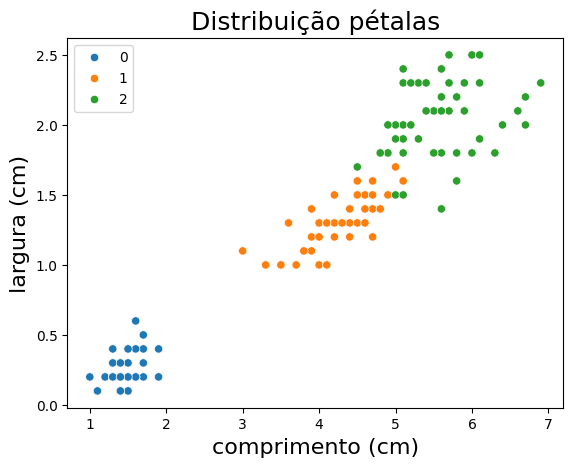

In [10]:
# Visualização da distribuição das pétalas
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=x[:,2],y=x[:,3],hue=y,palette='tab10')
plt.xlabel('comprimento (cm)',fontsize =16)
plt.ylabel('largura (cm)', fontsize=16)
plt.title('Distribuição pétalas', fontsize = 18)
plt.show()

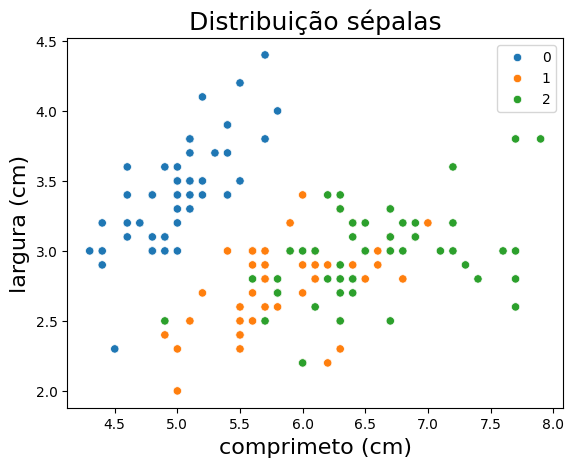

In [11]:
# Visualização da distribuição das sépalas
sns.scatterplot(x = x[:,0], y = x[:,1], hue = y, palette = "tab10")
plt.xlabel('comprimeto (cm)', fontsize = 16)
plt.ylabel('largura (cm)', fontsize = 16)
plt.title('Distribuição sépalas', fontsize = 18)
plt.show()

### Tratamento

#### Categorização

In [12]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [13]:
from tensorflow import keras

# converte a classificação para binário a fim de facilitar na categorização
# muito utilizado quando com a função de ativação softmax
# Exemplo:
# y = [0, 1, 2, 0, 1, ...]  # por exemplo, três classes: Setosa (0), Versicolor (1), Virginica (2)
# [1, 0, 0]  → classe 0  
# [0, 1, 0]  → classe 1  
# [0, 0, 1]  → classe 2
y = keras.utils.to_categorical(y)
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

#### Normalização

Os dados serão normalizados entre [0, 1], para isso utilizamos o método [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler)

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

#### Separação de conjunto

A separação em conjuntos de treino e teste garantem um melhor processo de criação do modelo. Esses conjuntos são definidos a partir do conjunto total de dados, o qual separameos por proporções:

* **80%** - Treino
* **20%** - Teste

In [15]:
from sklearn.model_selection import train_test_split

# stratify garante que a proporção das classes em y (20%) seja mantida
# random_state é a semente do gerador de números aleatórios, garantindo reprodutibilidade
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [16]:
# conferência
x_treino.shape

(120, 4)

In [17]:
# conferência
x_teste.shape

(30, 4)

## Modelo - MLP

### Criação do modelo

Fazemos um modelo MLP definido por 1 camada de entrada, 1 camada oculta e 1 camada de saída.

In [28]:
modelo = keras.Sequential([
    keras.layers.InputLayer(shape=[4,] , name='entrada'),  # camada de entrada
    keras.layers.Dense(512, activation='relu', name='oculta', kernel_initializer=keras.initializers.RandomNormal(seed=142)), # camada oculta
    keras.layers.Dense(3, activation='softmax', name='saida') # camada de saída
])

modelo.summary() # relatório
# O None no relatório significa que a entrada é flexível e será determinada somente no momento da execução
# 2560 = (512 neurônios x 4 features ) + 512 bias
# 1539 = (512 neurônios x 3 neurônios) + 3 bias

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ oculta (Dense)                  │ (None, 512)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ saida (Dense)                   │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,099 (16.01 KB)

 Trainable params: 4,099 (16.01 KB)

 Non-trainable params: 0 (0.00 B)

### Treinamento

#### Compilando o modelo

Compilar o modelo se dá pelo método [`compile`](https://keras.io/api/models/model_training_apis/). Nessa etapa devemos especificar a função de perda e o otimizador a ser usado. Uma opção também é especificar as métricas a serem calculadas durante o treinamento e avaliação do modelo.

In [19]:
modelo.compile(
    loss='categorical_crossentropy',    # cálculo do erro
    optimizer = 'rmsprop',              # ajusta os pesos para minimizar o erro, usando o gradiente calculado no backward propagation
    metrics = ['categorical_accuracy']  # mede a proporção de acertos em classificações com rótulos one-hot (rótulos one-hot: são classes que são representadas como vetores binários)
)

**Explicação:**

1. A perda escolhida foi a `'categorical_crossentropy'` pois os resultads em y são valores categóricos.
2. O uso do otimizador `'rmsprop'` indica que iremos treinar o modelo baseado em gradiente descendente, que calcula a média móvel de gradientes quadrados para normalizar o gradiente (processo de retropropagação será aplicado ao realizar o treinamento).
3. Por esse modelo ser um classificador simples, é interessante calcular o valor da acurácia durante o treino e validação.

#### Treino

O treinamento é feito com o método `fit`, sendo especificado as entredas e saídas esperadas de treino, épocas e também os dados de validação.

**Explicação:**

1. Para treinamento é preciso passar os dados de entradas e saídas do conjunto de treinamento.
2. Nesse caso o número de épocas também é essencial pois o padrão da biblioteca é 1 época, o que não é tão bom para o aprendizado.
3. Passamos também a porcentagem do conjunto de validação para serem considerados do conjunto de treino - 30% do conjunto de treino

In [20]:
epocas = 100
historico = modelo.fit(
    x_treino,                   # dados de entrada de treino
    y_treino,                   # dados de saída de treino
    epochs=epocas,              # épocas para o treinamento
    validation_split = 0.3      # definir um conjunto de validação (validar o treinamento - evitar o overfitting). Dos dados de treino, 30% será para validação
)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - categorical_accuracy: 0.4453 - loss: 1.0993 - val_categorical_accuracy: 0.6389 - val_loss: 1.0339
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - categorical_accuracy: 0.6869 - loss: 1.0139 - val_categorical_accuracy: 0.6389 - val_loss: 0.9851
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - categorical_accuracy: 0.6596 - loss: 0.9658 - val_categorical_accuracy: 0.6389 - val_loss: 0.9453
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - categorical_accuracy: 0.6791 - loss: 0.9252 - val_categorical_accuracy: 0.6389 - val_loss: 0.9112
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - categorical_accuracy: 0.6713 - loss: 0.8872 - val_categorical_accuracy: 0.6389 - val_loss: 0.8794
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - categorical_accuracy: 0.6869 - loss: 0.8458 - val_categorical_accuracy: 0.6389 - val_loss: 0.8507
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - categorical_accuracy: 0.6908 - loss: 0.8095 - va

**Interpretando a exibição:**

Exemplo de exibição: 
```
Epoch 100/100
3/3 [==============================] - 0s 47ms/step - loss: 0.1451 - categorical_accuracy: 0.9524 - val_loss: 0.1456 - val_categorical_accuracy: 0.9722
```
- A época de treinamento: *`Epoch 100/100`*
- Quantidade de **instâncias processadas**: *`3/3`*
  * Aqui, temos a quantidade de amostras divididas pela número de [batch_size](https://www.deeplearningbook.com.br/o-efeito-do-batch-size-no-treinamento-de-redes-neurais-artificiais/). Normalmente a batch é definida com 32 no keras, temos 84 amostras (70% do conjunto de treino) no treinamento, resultando assim em aproximadamente 3 instâncias.
- A barra de progresso: *`[==============================]`*
- Tempo de treinamento de cada amostra: *`0s 13ms/step`*
- Perda e acurária no conjunto de treinamento: *`loss: 0.1506 - categorical_accuracy: 0.9524`*
- Perda e acurária no conjunto de validação: *`val_loss: 0.1494 - val_categorical_accuracy: 0.9722`*

### Avaliação

#### Aprendizado

Podemos avaliar o desempenho do nosso modelo durante o treinamento com os dados de `historico` através do método `history` e plotar o processo de aprendizado

In [21]:
# todos os dados do treinamento (dados, loss, acurácia etc.)
historico.history

{'categorical_accuracy': [0.5,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.6904761791229248,
  0.6904761791229248,
  0.7142857313156128,
  0.6904761791229248,
  0.7142857313156128,
  0.773809552192688,
  0.738095223903656,
  0.726190447807312,
  0.738095223903656,
  0.7857142686843872,
  0.75,
  0.726190447807312,
  0.7976190447807312,
  0.8571428656578064,
  0.8214285969734192,
  0.9047619104385376,
  0.8809523582458496,
  0.8809523582458496,
  0.8928571343421936,
  0.8452380895614624,
  0.9047619104385376,
  0.8928571343421936,
  0.8809523582458496,
  0.9047619104385376,
  0.9047619104385376,
  0.8928571343421936,
  0.9047619104385376,
  0.9047619104385376,
  0.9166666865348816,
  0.9285714030265808,
  0.9285714030265808,
  0.9523809552192688

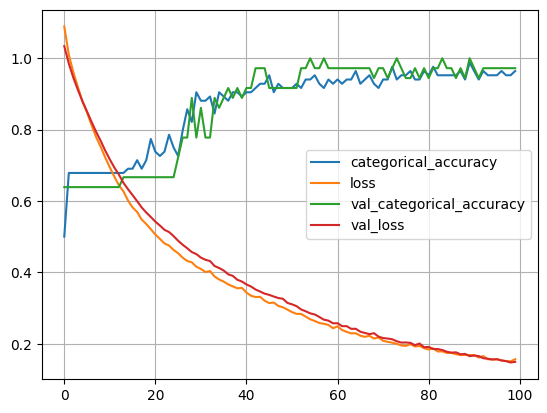

In [22]:
import pandas as pd

pd.DataFrame(historico.history).plot()
plt.grid()
plt.show()

Para observar mais de perto o aprendizado do modelo podemos plotar curvas individuais e perceber como no aprendizado, ambos os conjuntos obtiveram resultados similares. Isso nos garante que não ocorreu sobreajuste no treinamento.

A constancia das curvas é diferente pois os valores de erro  da validação é calculada por época e para o treinamento é feito uma média dos valores de erro durante as iterações de cada época.

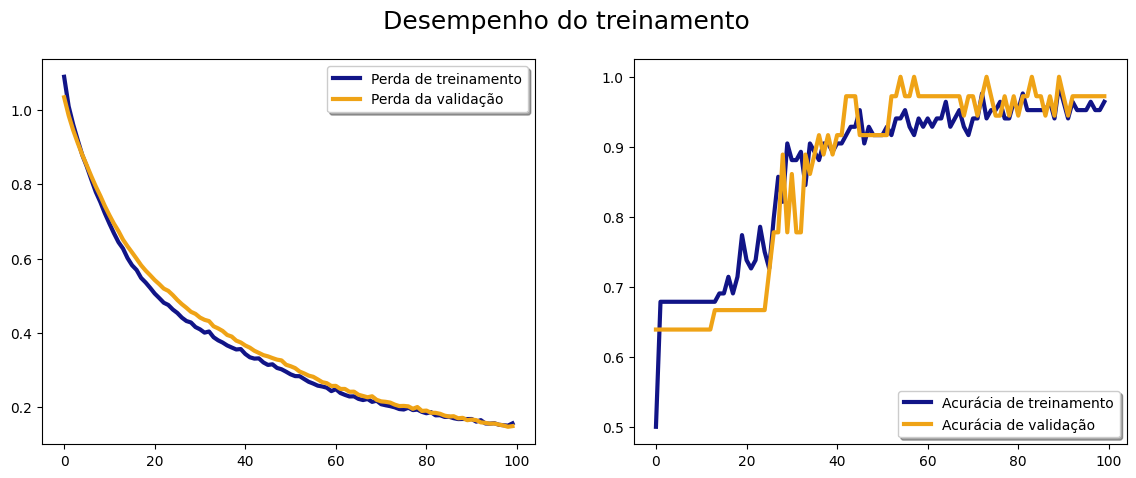

In [23]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(historico.history['loss'], color='#111487', linewidth=3, label="Perda de treinamento")
ax[0].plot(historico.history['val_loss'], color='#EFA316', linewidth=3, label="Perda da validação")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(historico.history['categorical_accuracy'], color='#111487', linewidth=3, label="Acurácia de treinamento")
ax[1].plot(historico.history['val_categorical_accuracy'], color='#EFA316', linewidth=3, label="Acurácia de validação")
legend = ax[1].legend(loc='best', shadow=True)

plt.suptitle('Desempenho do treinamento', fontsize = 18)
plt.show()

#### Teste

Podemos testar o modelo e verificar seu resultado final através do método [`evaluate`](https://keras.io/api/models/model_training_apis/#:~:text=%5Bsource%5D-,evaluate%20method,-Model.evaluate) que nos mostra a perda e acurácia obtida no conjunto de teste.

In [24]:
modelo.evaluate(x_teste, y_teste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - categorical_accuracy: 0.9333 - loss: 0.1566


[0.15661874413490295, 0.9333333373069763]

O método [`predict`](https://keras.io/api/models/model_training_apis/#:~:text=%5Bsource%5D-,predict%20method,-Model.predict) gera a predição do modelo para as entradas enviadas.

Faremos o teste: as entradas `[[0.61, 0.5, 0.69, 0.79]]` devem resultar em uma indicação de flor Virginica - `[0., 0., 1.]`

In [25]:
import numpy as np
entrada = np.array([[0.61, 0.5, 0.69, 0.79]])   # flor viginica
resultado = modelo.predict(entrada)
resultado

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[7.7218036e-05, 3.0376339e-01, 6.9615942e-01]], dtype=float32)

In [26]:
# Converte para porcentagens

porcentagens = resultado[0] * 100

for i, p in enumerate(porcentagens):
    print(f"Classe {i}: {p:.2f}%")

Classe 0: 0.01%
Classe 1: 30.38%
Classe 2: 69.62%


In [27]:
# Resultado da previsão

classe_prevista = np.argmax(porcentagens)
nomes_das_classes = datasets.load_iris()['target_names']
print(f"Classe prevista: {nomes_das_classes[classe_prevista]} ({porcentagens[classe_prevista]:.2f}%)")

Classe prevista: virginica (69.62%)
